In [103]:
import sqlite3
import pandas as pd
import optuna

db_file= 'hp_tuning_cora_p_mi.db'

In [104]:
study = optuna.create_study(
        directions=['maximize', 'maximize'],
        study_name=f"{'Cora_p'}_{'5.0'}_{'retrain'}",
        load_if_exists=True,
        storage='sqlite:///hp_tuning_cora_p_mi.db',
    )

[I 2024-08-21 11:30:58,614] Using an existing study with name 'Cora_p_5.0_retrain' instead of creating a new one.


In [105]:
trials = study.get_trials()

values = []

for trial in trials:
    values.append((trial.values[0], trial.values[1]))

values

[(1.1758811202673387, 0.7121089848798546),
 (0.9953521639712898, 0.8212653481303475),
 (0.9485426236391856, 0.8087681658810186),
 (0.8507021803278503, 0.8255873159741327),
 (1.0283235862527267, 0.7279153569683376),
 (0.9940114612358794, 0.826606249792974),
 (1.0996413469956254, 0.7219808589354135),
 (0.9827221609060981, 0.8136487005809037),
 (0.8207775917564044, 0.8165071968796469),
 (1.0499267145532238, 0.7435303125482756),
 (0.9647529884410851, 0.8293785646927706),
 (1.0658215976596017, 0.7219348368958398),
 (0.9741359036801228, 0.7462750728511298),
 (1.1254660708614204, 0.7119912915748302),
 (0.895792839892612, 0.812326959329708),
 (0.9744347957157272, 0.8179916275064059),
 (0.8329911756942339, 0.8663826295820876),
 (1.045835088387595, 0.7161823750831401),
 (0.9444603987119565, 0.8058951594487792),
 (0.9170179605495775, 0.7562178853371143),
 (1.0880074467702878, 0.7302519281622345),
 (1.046152766993158, 0.7324753496282621),
 (0.9046527077424245, 0.8291145975167444),
 (1.051837740031

In [106]:
forg= [val[0] for val in values]
util= [val[1] for val in values]

minf, maxf= min(forg), max(forg)
minu, maxu= min(util), max(util)

In [107]:
norm_f= [(val-minf)/(maxf-minf) for val in forg]
norm_u= [(val-minu)/(maxu-minu) for val in util]

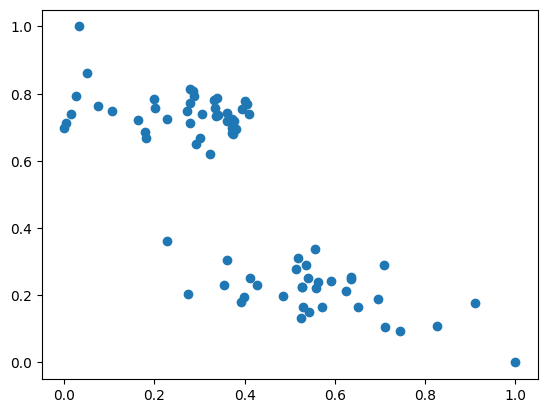

In [108]:
plt.scatter(norm_f, norm_u)

In [109]:
import matplotlib.pyplot as plt
import numpy as np
alpha= 0.35
k=10
vals= [alpha*val[0]+(1-alpha)*val[1] for val in zip(norm_f, norm_u)]
arr= np.array(vals)
np.argmax(arr)
ind = np.argpartition(arr, -k)[-k:]
for inv in ind:
    print(values[inv])

(0.9427684108253708, 0.8307215581596928)
(0.9953521639712898, 0.8212653481303475)
(0.962047845785016, 0.8285945777829631)
(0.9393454093622903, 0.8344044938616273)
(0.9647529884410851, 0.8293785646927706)
(0.9421095634377878, 0.833425719402159)
(0.9886071074107499, 0.8238667659023001)
(0.9940114612358794, 0.826606249792974)
(0.9921259366559187, 0.8281046042852088)
(0.8329911756942339, 0.8663826295820876)
